# Task 3: Neural Networks

Multi-class Classification: Your goal is to predict a discrete value y (0, 1, 2, 3 or 4) based on a vector x.

Potential approaches / tools to consider: Neural networks / Deep Learning (Theano, TensorFlow, Torch, Lasagne)

In [74]:
import tensorflow 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD
from keras.callbacks import History, Callback
from keras.utils import np_utils, to_categorical
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

%matplotlib inline

#### Data Import

In [62]:
train = pd.read_hdf("data/train.h5", "train")
train_labels = train['y'].as_matrix()
train_data = train.ix[:, 1:].astype(float).as_matrix()
test_data = pd.read_hdf("data/test.h5", "test").as_matrix()

#### Split Data into Train and Validation Set 

In [17]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(train_data, train_labels, 
                                                                    test_size=0.33, random_state=42)

#### Convert Labels

In [19]:
labels_cat = to_categorical(train_labels, num_classes=5)
y_train_cat = to_categorical(y_train, num_classes=5)
y_test_cat = to_categorical(y_test, num_classes=5)

### Neural Network Model: Baseline Model

The function below creates a baseline neural network, a simple, fully connected network with one hidden layer that contains 100 neurons. The hidden layer uses a rectifier activation function which is a good practice. The output value with the largest value will be taken as the class predicted by the model.

The **network topology** can be summarised by: 
*100 inputs -> [100 hidden nodes] -> 5 outputs* 

In [66]:
model = Sequential()
model.add(Dense(64, input_dim=100, kernel_initializer='normal', 
                activation='relu'))
model.add(Dense(5, kernel_initializer='normal', activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

In [67]:
model.fit(train_data, labels_cat, epochs=10, batch_size=64)

Epoch 1/10
45324/45324 [==============================] - 0s - loss: 0.6615 - acc: 0.7936     
Epoch 2/10
45324/45324 [==============================] - 0s - loss: 0.4032 - acc: 0.8642     
Epoch 3/10
45324/45324 [==============================] - 0s - loss: 0.3439 - acc: 0.8852     
Epoch 4/10
45324/45324 [==============================] - 0s - loss: 0.3075 - acc: 0.8991     
Epoch 5/10
45324/45324 [==============================] - 0s - loss: 0.2808 - acc: 0.9087     
Epoch 6/10
45324/45324 [==============================] - 0s - loss: 0.2618 - acc: 0.9148     
Epoch 7/10
45324/45324 [==============================] - 0s - loss: 0.2465 - acc: 0.9204     
Epoch 8/10
45324/45324 [==============================] - 0s - loss: 0.2349 - acc: 0.9241     
Epoch 9/10
45324/45324 [==============================] - 0s - loss: 0.2244 - acc: 0.9276     
Epoch 10/10
45324/45324 [==============================] - 0s - loss: 0.2160 - acc: 0.9308     


In [68]:
model.predict(test_data, batch_size=64)

array([[  9.62778926e-01,   8.55894003e-04,   5.47987921e-03,
          5.45128202e-03,   2.54339222e-02],
       [  2.69350447e-02,   9.96673945e-04,   4.78248388e-01,
          4.31844778e-02,   4.50635374e-01],
       [  2.93500954e-04,   4.36020446e-06,   2.73193233e-03,
          3.52676085e-04,   9.96617496e-01],
       ..., 
       [  2.54674233e-03,   3.89729166e-06,   6.36458513e-04,
          9.96709704e-01,   1.03122213e-04],
       [  5.64311406e-08,   6.86394319e-09,   9.99921799e-01,
          7.81826457e-05,   6.84206858e-11],
       [  1.93114975e-03,   5.83559508e-03,   2.51577526e-01,
          1.68578012e-03,   7.38969922e-01]], dtype=float32)

### Multilayer Perceptron (MLP) for multi-class softmax classification

In [35]:
model = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.

model.add(Dense(64, activation='relu', input_dim=100))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.fit(X_train, y_train_cat, epochs=20, batch_size=128)
score = model.evaluate(X_test, y_test_cat, batch_size=128)

Epoch 1/20
30367/30367 [==============================] - 0s - loss: 1.6111 - acc: 0.2479     
Epoch 2/20
30367/30367 [==============================] - 0s - loss: 1.4796 - acc: 0.3581     
Epoch 3/20
30367/30367 [==============================] - 0s - loss: 1.3598 - acc: 0.4524     
Epoch 4/20
30367/30367 [==============================] - 0s - loss: 1.2540 - acc: 0.5122     
Epoch 5/20
30367/30367 [==============================] - 0s - loss: 1.1650 - acc: 0.5552     
Epoch 6/20
30367/30367 [==============================] - 0s - loss: 1.0874 - acc: 0.5928     
Epoch 7/20
30367/30367 [==============================] - 0s - loss: 1.0316 - acc: 0.6183     
Epoch 8/20
30367/30367 [==============================] - 0s - loss: 0.9855 - acc: 0.6395     
Epoch 9/20
30367/30367 [==============================] - 0s - loss: 0.9489 - acc: 0.6570     
Epoch 10/20
30367/30367 [==============================] - 0s - loss: 0.9134 - acc: 0.6699     
Epoch 11/20
30367/30367 [========================

In [36]:
score

[0.50973771133229651, 0.83706625661022993]

### Theory and Model Design

**Activation function** of a node defines the output of that node given an input or set of inputs.
- softmax
- elu
- softpuls
- softsign
- relu
- tanh
- sigmoid
- hard_sigmoid
- linear

Fully connected layers are defined using the *Dense* class. We can specify the number of neurons in the layer as the first argument, the initialization method as the second argument as *init* and specify the activation function using the activation argument.

In [32]:
model = Sequential()
model.add(Dense(32, input_dim=100, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [39]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [82]:
history = History()
model.fit(X_train, y_train_cat, epochs=150, batch_size=100, callbacks=[history])

Epoch 1/150
30367/30367 [==============================] - 0s - loss: 0.3626 - acc: 0.8933     
Epoch 2/150
30367/30367 [==============================] - 0s - loss: 0.3765 - acc: 0.8913     
Epoch 3/150
30367/30367 [==============================] - 0s - loss: 0.3651 - acc: 0.8932     
Epoch 4/150
30367/30367 [==============================] - 0s - loss: 0.3683 - acc: 0.8931     
Epoch 5/150
30367/30367 [==============================] - 0s - loss: 0.3643 - acc: 0.8935     
Epoch 6/150
30367/30367 [==============================] - 0s - loss: 0.3716 - acc: 0.8925     
Epoch 7/150
30367/30367 [==============================] - 0s - loss: 0.3729 - acc: 0.8915     
Epoch 8/150
30367/30367 [==============================] - 0s - loss: 0.3702 - acc: 0.8926     
Epoch 9/150
30367/30367 [==============================] - 0s - loss: 0.3742 - acc: 0.8896     
Epoch 10/150
30367/30367 [==============================] - 0s - loss: 0.3658 - acc: 0.8929     
Epoch 11/150
30367/30367 [=============

30367/30367 [==============================] - 0s - loss: 0.3789 - acc: 0.8893     
Epoch 86/150
30367/30367 [==============================] - 0s - loss: 0.3711 - acc: 0.8905     
Epoch 87/150
30367/30367 [==============================] - 0s - loss: 0.3748 - acc: 0.8894     
Epoch 88/150
30367/30367 [==============================] - 0s - loss: 0.3772 - acc: 0.8903     
Epoch 89/150
30367/30367 [==============================] - 0s - loss: 0.3769 - acc: 0.8923     
Epoch 90/150
30367/30367 [==============================] - 0s - loss: 0.3759 - acc: 0.8907     
Epoch 91/150
30367/30367 [==============================] - 0s - loss: 0.3759 - acc: 0.8904     
Epoch 92/150
30367/30367 [==============================] - 0s - loss: 0.3766 - acc: 0.8893     
Epoch 93/150
30367/30367 [==============================] - 0s - loss: 0.3807 - acc: 0.8919     
Epoch 94/150
30367/30367 [==============================] - 0s - loss: 0.3737 - acc: 0.8886     
Epoch 95/150
30367/30367 [=================

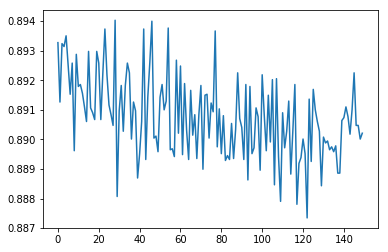

In [83]:
plt.plot(history.epoch, history.history["acc"])

In [50]:
scores = model.evaluate(X_train, y_train_cat)

28480/30367 [===========================>..] - ETA: 0s

'categorical_crossentropy'

In [41]:
predictions = model.predict(X_test)

In [45]:
rounded = [np.argmax(x) for x in predictions]

14957

In [47]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, rounded)

In [48]:
acc

0.92705756501972325